# Feature Matching applie to Cereal image

### Feature matching extract defining key features from an input image (using ideas from corner, edge, and contour detection)

**Import library's**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load Cereal Box image**

In [2]:
reeses = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/reeses_puffs.png', 0)

**Create function to display image**

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

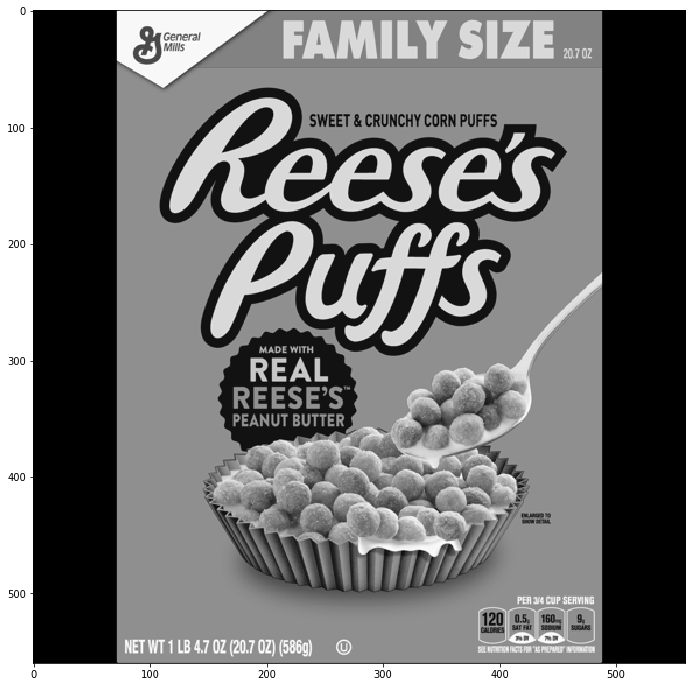

In [4]:
display(reeses)

**Load the target image**

In [4]:
cereals = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/many_cereals.jpg', 0)


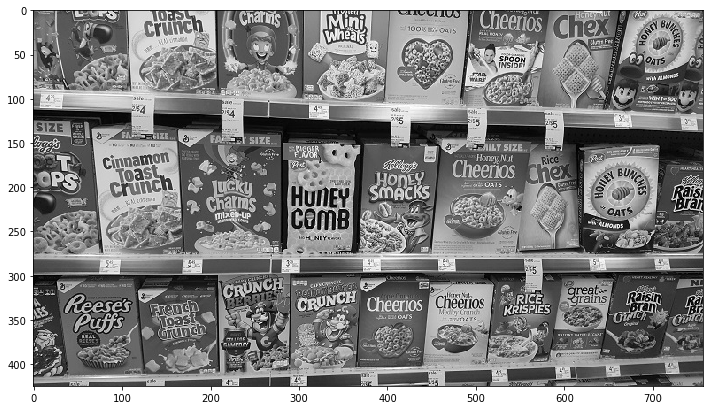

In [6]:
display(cereals)

## Using Brute-Force Matchin with ORB Descriptors

In [7]:
orb = cv2.ORB_create()

In [8]:
keypoints1, descriptors1 = orb.detectAndCompute(reeses, None)
keypoints2, descriptors2 = orb.detectAndCompute(cereals, None)

In [9]:
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = brute_force.match(descriptors1, descriptors2)

In [12]:
single_match = matches[0]

In [15]:
single_match.distance

72.0

In [16]:
len(matches)

136

In [14]:
# use lambda expressions

matches = sorted(matches, key=lambda x:x.distance)

In [17]:
reeses_matches = cv2.drawMatches(reeses, keypoints1, cereals, keypoints2, matches[:25], None, flags=2)

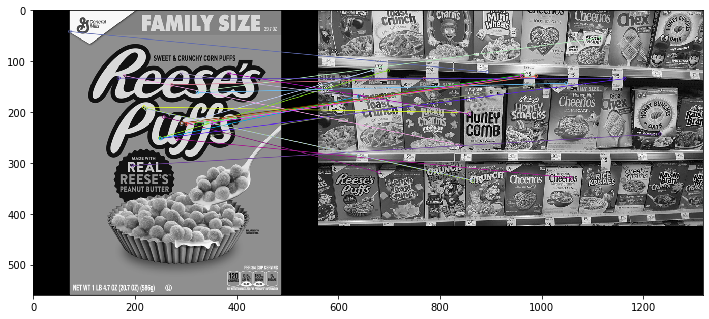

In [18]:
display(reeses_matches)

# Using Scale-invariant Feature Transform (SIFT) Descriptors

### For more details of concepts, please <a href='https://en.wikipedia.org/wiki/Scale-invariant_feature_transform'>Click Here</a>.

In [5]:
sift = cv2.xfeatures2d.SIFT_create()

In [6]:
keypoints1, descriptors1 = sift.detectAndCompute(reeses, None)
keypoints2, descriptors2 = sift.detectAndCompute(cereals, None)

In [7]:
bf = cv2.BFMatcher()

In [8]:
# Apply knn algorithm
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [9]:
len(matches)

1500

In [13]:
good = []

# Less distance == Better match
# 
# Ratio match1 < 75% Match2
for match1, match2 in matches:
    
    # If match 1 distanceis less than 75% of match 2 distance
    # then descriptor was a good match, lets keep it!
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [14]:
len(good)

78

In [15]:
sift_matches = cv2.drawMatchesKnn(reeses, keypoints1, cereals, keypoints2, good, None, flags=2)

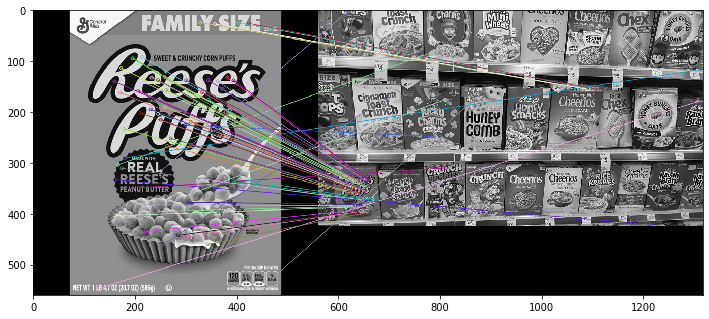

In [17]:
display(sift_matches)

# Apply Fast Library for Approximate Nearest Neighbors (FLANN) Based Matching


**Create function to display image**

In [18]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [19]:
sift = cv2.xfeatures2d.SIFT_create()

In [20]:
keypoints1, descriptors1 = sift.detectAndCompute(reeses, None)
keypoints2, descriptors2 = sift.detectAndCompute(cereals, None)

**Find FLANN parameters**

In [21]:
flann_index_kdtree = 0
index_params = dict(algorithm=flann_index_kdtree, trees=5)
seach_params = dict(checks=50) # {'check':50}

In [22]:
flann = cv2.FlannBasedMatcher(index_params, seach_params)

In [24]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [25]:
good = []

for match1, match2 in matches:
    
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])


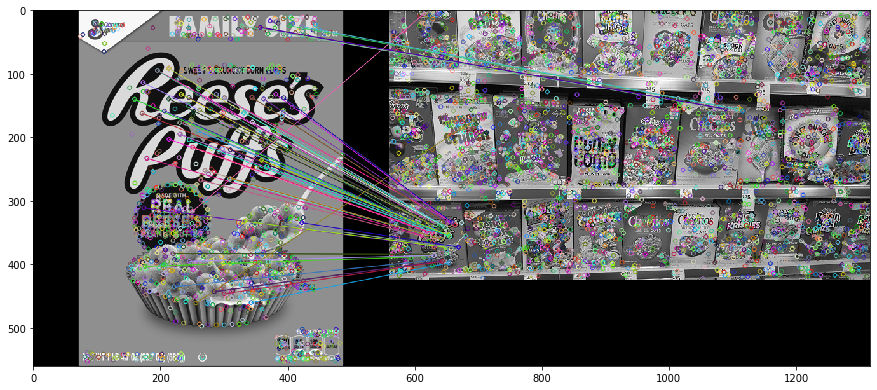

In [27]:
flann_matches = cv2.drawMatchesKnn(reeses, keypoints1, cereals, keypoints2,
                                  good, None, flags=0)
display(flann_matches)

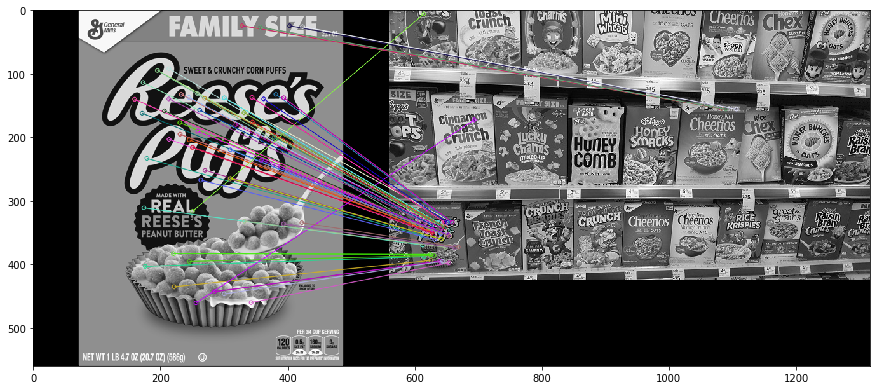

In [28]:
flann_matches = cv2.drawMatchesKnn(reeses, keypoints1, cereals, keypoints2,
                                  good, None, flags=2)
display(flann_matches)